<a href="https://colab.research.google.com/github/Adjalma/Mini-Projeto-DNC/blob/main/Mini_Projeto_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Questão de Negócio:**

Uma área específica que tem tido bastante pesquisa e investimento em torno de Machine Learning e Inteligência Artificial, é a área de imóveis. Com dados de uma região, um algoritmo pode classificar e identificar se aquele imóvel é bom ou não para comprar, auxiliando uma pessoa na examinação de um imóvel de forma que ele seja o melhor para o cliente. Não só isso, algoritmos de machine learning podem trazer novos insights na compra e venda de imóveis, ao aprender os dados e designar uma importância a cada uma das variáveis nos dados do imóvel. Portanto um dos grandes desafios é encontrar modelos e algoritmos que equilibram a precisão na compra de um imóvel. Esse estudo busca aprofundar no diagnóstico de como irenmos escolher 5 imóveis para investir e 5 imóveis que não deixariamos nosso cliente investir de modo algum.

# **O Entendimento do Negócio:**

Os dados são da ***geodacenter.github.io***, em King County - Condado de King - Washington, Estados Unidos. O Condado de King é um dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle. Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12º mais populoso do país. O Dataset apresenta a venda de imóveis e suas características na região de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total de 21 atributos. Iremos buscar as ferramentas necessárias para catalogar e mostrar quais são os 5 melhores imóveis devemos investir e quais são os 5 piores imóveis a se investir de acordo com os dados recebidos.

# **A Coleta de Dados:**

Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

Dataset Detalhado: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
%matplotlib inline
import pandas as pd

In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

In [ ]:
kcs = pd.read_csv("/content/kc_house_data.csv")
print("quantidade de linhas no dataset {}".format(kcs.shape[0])) 
kcs.head()

quantidade de linhas no dataset 21613


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# **A Limpeza de Dados:**

- Remoção de dados outliers e valores ausentes

Carregammos nosso dataset por completo com a função do Pandas e notamos que ele possuem 21.613 registros (linhas). A priori não precisamos utilizar todos os dados então iremos selecionar apenas 10.000 linhas do conjunto de dados!

In [ ]:
kcs = pd.read_csv('/content/kc_house_data.csv', nrows= 21613)
print("Quantidade de linhas do dataset {}".format(kcs.shape[0]))
kcs.head()

Quantidade de linhas do dataset 21613


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Selecionamos apenas as variáveis numericas para nossa análise!**

In [ ]:
from numpy.core import numeric
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(kcs.select_dtypes(include=numerics).columns)
kcs = kcs[numerical]
print(kcs.shape)
kcs.head()

(21613, 20)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Após selecionar as colunas numericas ainda temos 20 variáveis para nossa atividade**

# **Para simplificar a separação dos dados de treino e teste iremos utilizar o train_test_split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(kcs.drop(['price', 'id'], axis=1), kcs['price'], test_size=0.3, random_state=0)

print('Dados de treino {}'.format(X_train.shape))
print()
print('Dados de teste {}'.format(X_test.shape) )

Dados de treino (15129, 18)

Dados de teste (6484, 18)


Mutual information

Relação entre as variaveis e a variavel target.
Se X e Y são independentes, então nenhuma informação sobre Y pode ser obtida conhecendo X ou vice-versa.
Portanto sua informação mútua é 0.
Se X é uma função determinística de Y, então podemos determinar X de Y e Y de X com informação mútua 1.
Quanto menor o valor, menos a variavel descreve a relação com o Target!

A vantagem de usar informações mútuas sobre o F-Test é que ele se dá bem com a relação não linear entre as variáveis de recursos e de Target.

In [ ]:
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.29936838, 0.28553456, 0.31503085, 0.05485638, 0.72025588,
       0.00264038, 0.05037722, 0.29592323, 0.60808179, 0.19513355,
       0.05272946, 0.06149131, 0.01227707, 0.19536359, 0.30634039,
       0.05644026, 0.22917707, 0.06942698])

In [ ]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi = mi.sort_values(ascending = False)

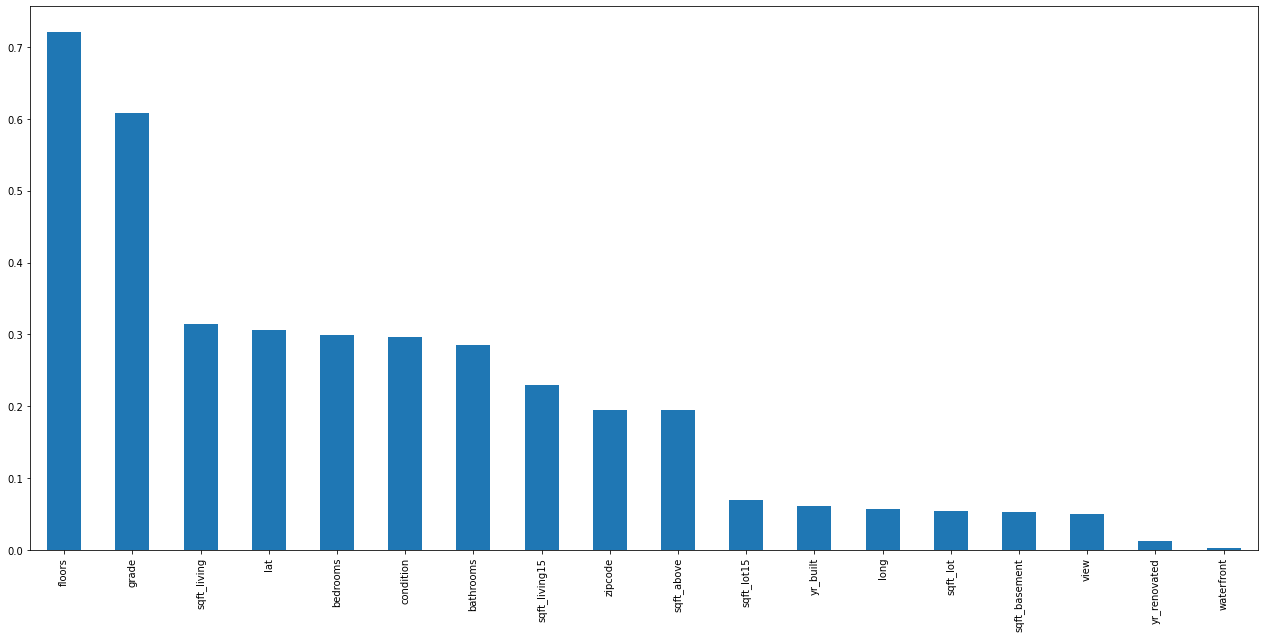

In [ ]:
mi.plot.bar(figsize=(22, 10));

Geralmente utiliza-se a seleção de 10 ou 20 melhores atributos para descrever o Target (depende do tamanho do conjunto de dados).
A combinação de SelectKBest, SelectPercentile para ser uma boa opção!
Exemplo selecionando os 10 melhores atributos!
O código usando a classe SelectKBest da biblioteca feature_selection combinada com o método de máximo coeficiente de informações para selecionar recursos é a seguinte:

In [ ]:
sel_ = SelectKBest(mutual_info_classif, k=15).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
list(X_train.columns[sel_.get_support()])

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [ ]:
kcs = pd.read_csv('/content/kc_house_data.csv')
kcs.shape

(21613, 21)

In [ ]:
# Selecionando apenas as variáveis numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(kcs.select_dtypes(include=numerics).columns)
kcs = kcs[numerical]
print(kcs.shape)
kcs.head()

(21613, 20)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(kcs.drop(['price'], axis=1), kcs['price'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((15129, 19), (6484, 19))

# **Encontrando o mutual information com Regressão!**

# **A Exploração de Dados:**

* A Exploração de Dados:
- Visualização dos dados
- Quais as minhas métricas essenciais
- Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar.

In [ ]:
kcs.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## ***Análise final + Sugestão de imóveis ***

Baseado nestes pensamentos que você utilizou
para responder as perguntas acima, qual seria os 5
imóveis que a empresa deveria investir e o porquê e
quais 5 você não recomendaria o investimento de
jeito nenhum.

- Encontre a cidade de cada imóvel;
- Calcule o preço por área de imóvel;
- Calcule o lucro/ perda de investimento caso o imóvel
seja vendido mais de uma vez naquele período.